In [1]:
%matplotlib inline
%config inlineBackend.figure_format = 'retina'
import numpy as np
import pymc3 as pm

itemnum = 1000
with pm.Model() as poisson_model:
    #mu = pm.Uniform('mu', lower = 0, upper = 10.0)
    mu = pm.Exponential('mu', 1.0)
    p0 = pm.Poisson('p0', mu = 5 * mu, observed = 3)
    #p1 = pm.Poisson('p1', mu = 5 * mu)
    pp = pm.Poisson('pp', mu = mu)
    start = pm.find_MAP()
    step = pm.NUTS(state = start)
    trace = pm.sample(itemnum, step, start, njobs = 4)

Optimization terminated successfully.
         Current function value: 3.201909
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5


100%|██████████| 1000/1000 [00:03<00:00, 287.10it/s]


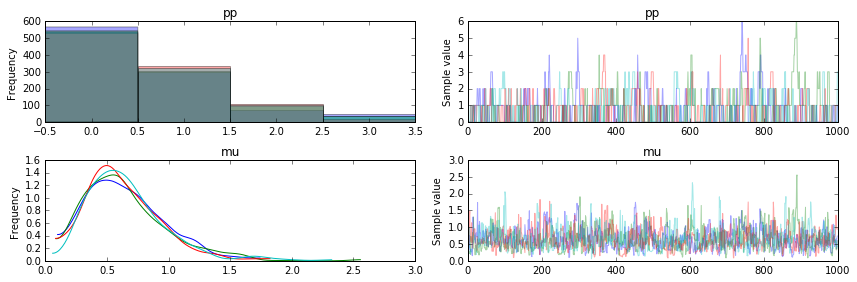

In [2]:
with poisson_model:
    pm.traceplot(trace)

In [3]:
with poisson_model:
    pm.summary(trace)


pp:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.654            0.882            0.040            [0.000, 2.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.000          0.000          0.000          1.000          3.000


mu:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.647            0.314            0.011            [0.106, 1.241]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.185          0.419          0.597          0.816          1.403



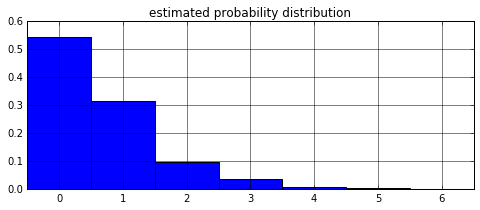

In [4]:
# probability mass function
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
def generate_pmf(d):
    hist = np.histogram(d, max(d) - min(d) + 1)
    return (lambda x: (hist[0] / d.size)[x - min(d)])
d = trace['pp']
pmf = generate_pmf(d)
x = np.arange(min(d), max(d) + 1)
plt.rcParams["figure.figsize"] = (8,3)
plt.title('estimated probability distribution')
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.grid(which='major',color='black',linestyle='-')
plt.xlim(x[0] - 0.5, x[-1] + 0.5)
plt.bar(x - 0.5, pmf(x), width=1.0)
plt.show()